# Crime Data Analysis

## Data Loading and Cleaning
The following Python code loads and cleans the crime dataset.

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv("2020-01-metropolitan-street.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file was not found. Please ensure it's in the correct directory.")

# --- Data Cleaning ---
print("\n--- Performing Data Cleaning ---")
# Drop the 'Context' column as it contains no useful data
df = df.drop(columns=['Context'])

# Fill missing values
df['Crime ID'] = df['Crime ID'].fillna('Not provided')
df['Last outcome category'] = df['Last outcome category'].fillna('Not provided')

# Drop rows with missing coordinates
df = df.dropna(subset=['Longitude', 'Latitude'])
print(f"Dataset shape after cleaning: {df.shape}")

Dataset loaded successfully.

--- Performing Data Cleaning ---
Dataset shape after cleaning: (90435, 11)

--- Performing Data Analysis ---

Top 10 Most Common Crime Types:
Crime type
Violence and sexual offences    18327
Anti-social behaviour           17546
Vehicle crime                   11902
Other theft                      9392
Burglary                         6875
Criminal damage and arson        4346
Drugs                            4247
Theft from the person            4204
Public order                     3984
Shoplifting                      3833
Name: count, dtype: int64

Top 10 Most Common Crime Locations:
Location
On or near Supermarket                            3457
On or near Parking Area                           2596
On or near Shopping Area                          2415
On or near Petrol Station                         1649
On or near Nightclub                              1295
On or near Sports/Recreation Area                 1168
On or near Theatre/Concert Hall    

C:\Users\Mac46-47\AppData\Local\Temp\ipykernel_26816\615384491.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index, palette='viridis')


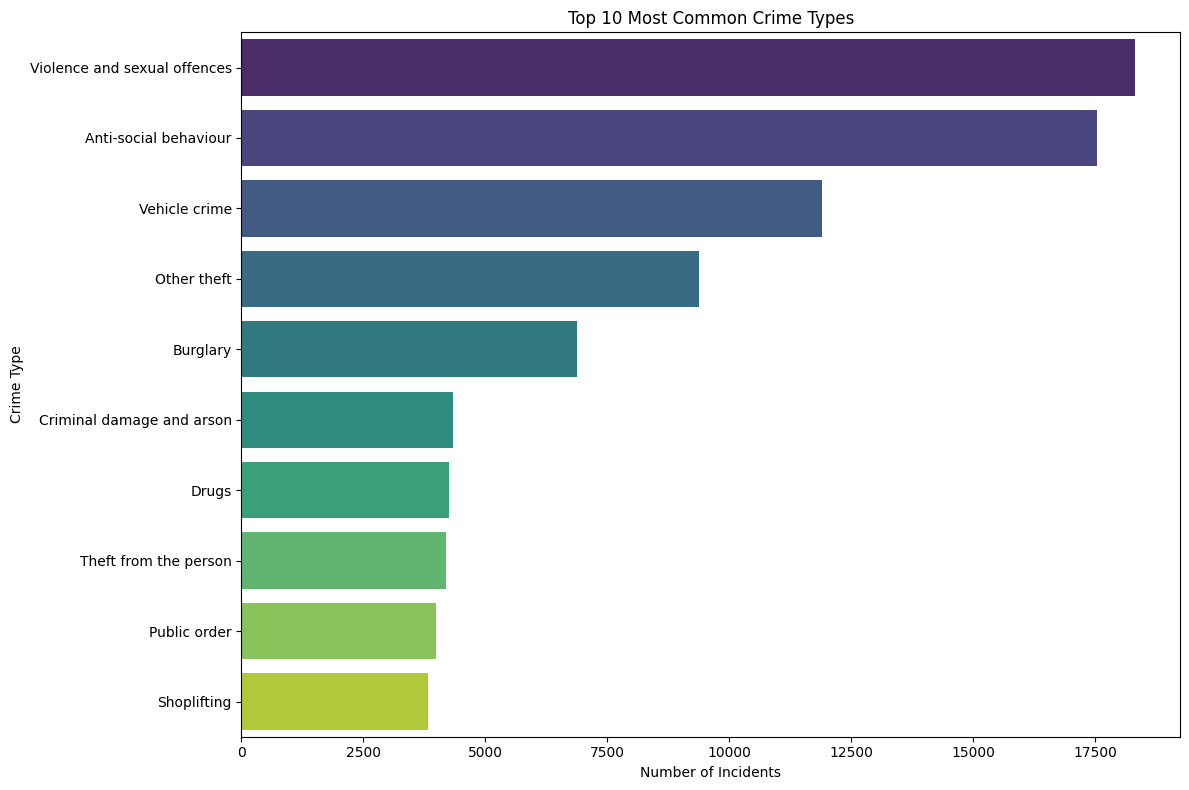

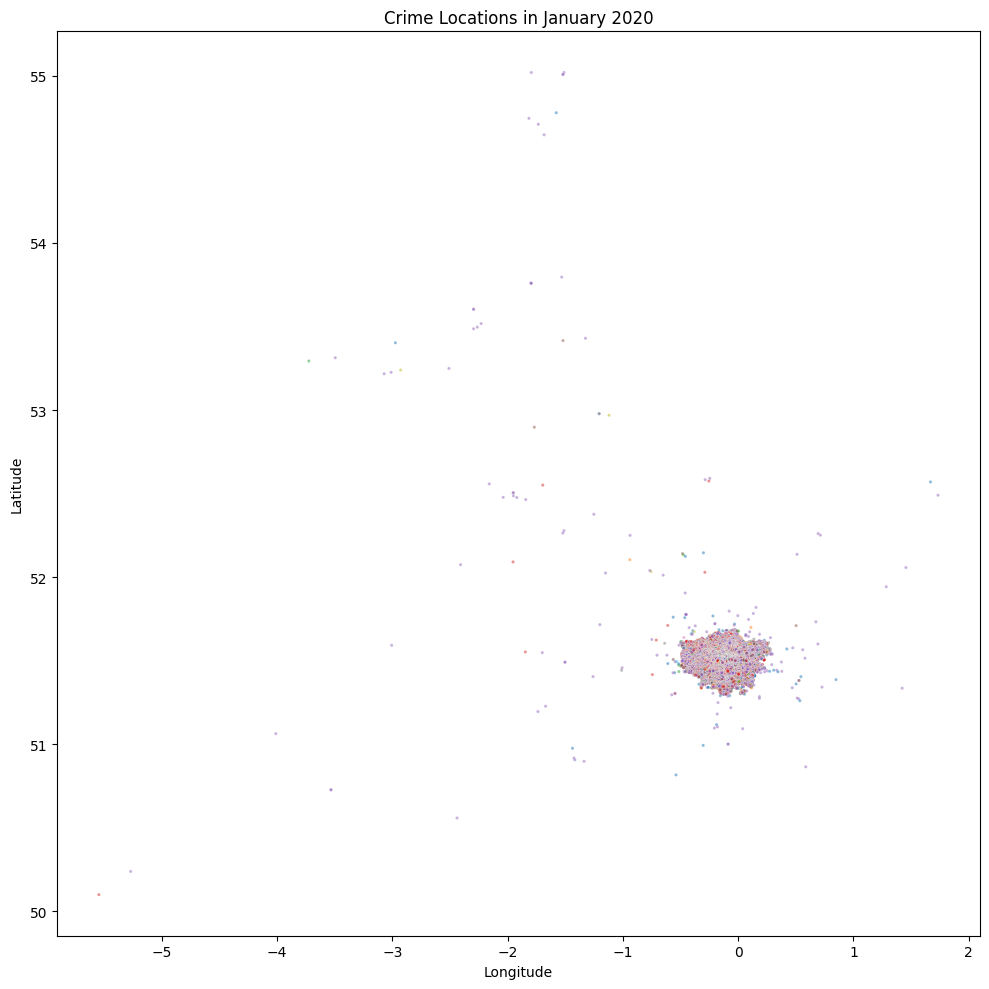

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('2020-01-metropolitan-street.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file '2020-01-metropolitan-street.csv' was not found. Please ensure it's in the same directory as this script.")

# --- Data Cleaning ---
print("\n--- Performing Data Cleaning ---")
# Drop the 'Context' column as it contains no useful data
df = df.drop(columns=['Context'])

# Fill missing values in 'Crime ID' and 'Last outcome category' with 'Not Provided'
df['Crime ID'] = df['Crime ID'].fillna('Not Provided')
df['Last outcome category'] = df['Last outcome category'].fillna('Not Provided')

# Drop rows with missing latitude or longitude values, as they can't be mapped
df = df.dropna(subset=['Longitude', 'Latitude'])
print(f"Dataset shape after cleaning: {df.shape}")

# --- Data Analysis ---
print("\n--- Performing Data Analysis ---")
# Find the top 10 most common crime types
top_10_crimes = df['Crime type'].value_counts().nlargest(10)
print("\nTop 10 Most Common Crime Types:")
print(top_10_crimes)

# Find the top 10 most common crime locations
top_10_locations = df['Location'].value_counts().nlargest(10)
print("\nTop 10 Most Common Crime Locations:")
print(top_10_locations)

# --- Data Visualization ---
print("\n--- Creating Visualizations ---")

# Bar chart of the top 10 most common crime types
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index, palette='viridis')
plt.title('Top 10 Most Common Crime Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

# Scatter plot of crime locations
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Longitude', y='Latitude', data=df, s=5, alpha=0.5, hue='Crime type', palette='tab10', legend=False)
plt.title('Crime Locations in January 2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()